In [1]:
import pandas as pd
import numpy as np

In [2]:
# 뭘로 인코딩했는지 확인하는 코드
import chardet


food_store_data = "서울특별시_일반음식점.csv"

with open(food_store_data, "rb") as file:
    raw_data = file.read(10000)  # 처음 10KB만 읽기
    result = chardet.detect(raw_data)
    print(result["encoding"])

EUC-KR


In [3]:
# df = pd.read_csv(food_store_data, encoding="EUC-KR")
with open(food_store_data, "r", encoding="euc-kr", errors="replace") as file:
    df = pd.read_csv(file)

C:\Users\ssair\AppData\Local\Temp\ipykernel_24964\897735991.py:3: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [4]:
df = df[
    [
        # "인허가일자",
        "사업장명",
        "상세영업상태코드",
        "소재지전체주소",
        "업태구분명",
    ]
]
# df["인허가일자"] = df["인허가일자"] // 10000
# df = df.set_index("인허가일자")
# df = df.sort_index()

df["소재지전체주소"] = df["소재지전체주소"].dropna()
df = df[df["상세영업상태코드"] != 2].drop(columns="상세영업상태코드")
df = df[
    (df["업태구분명"].str.contains("통닭", na=False))
    | (df["사업장명"].str.contains("치킨", na=False))
    | (df["사업장명"].str.contains("통닭", na=False))
]
df

,사업장명,소재지전체주소,업태구분명
10,국민삼오통닭,서울특별시 은평구 신사동 9-13,분식
30,청,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,비에이치씨 양평현대점,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,짝퉁,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,써브웨이 (광화문점),서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
...,...,...,...
124130,BBQ 남가좌점,서울특별시 서대문구 남가좌동 382-9,호프/통닭
124151,치킨대통령,서울특별시 구로구 오류동 47-1 삼익쇼핑,호프/통닭
124171,플레이걸,서울특별시 관악구 신림동 246-30,호프/통닭
124193,지코바 상봉1호점,서울특별시 중랑구 상봉동 268-36 1층,호프/통닭


In [5]:
# region_from_old_address = [
#     [
#         string
#         for string in str(address)
#         .replace(",", " ")
#         .replace("(", " ")
#         .replace(")", " ")
#         .split()
#         if string.endswith("구") or string.endswith("동")
#     ]
#     for address in df["소재지전체주소"]
# ]
# length = pd.DataFrame(len(region_data) for region_data in region_from_old_address)
# length.value_counts()
# [region_data for region_data in region_from_old_address if len(region_data) == 6]
# for region_datas
# region_datas = [
#     [region_data[0], region_data[-1]]
#     for region_data in region_datas
#     if len(region_data) == 2
# ]

# region_datas

In [6]:
def get_region(address):
    region_name = [
        "강남구",
        "강동구",
        "강북구",
        "강서구",
        "관악구",
        "광진구",
        "구로구",
        "금천구",
        "노원구",
        "도봉구",
        "동대문구",
        "동작구",
        "마포구",
        "서대문구",
        "서초구",
        "성동구",
        "성북구",
        "송파구",
        "양천구",
        "영등포구",
        "용산구",
        "은평구",
        "종로구",
        "중구",
        "중랑구",
    ]
    region = [string for string in str(address).split() if string in region_name]
    return region[0] if region else None


def get_district(address):
    district_name = [
        "세곡동",
        "대치동",
        "일원동",
        "삼성동",
        "역삼동",
        "압구정동",
        "수서동",
        "청담동",
        "자곡동",
        "개포동",
        "율현동",
        "신사동",
        "도곡동",
        "논현동",
        "암사동",
        "길동",
        "성내동",
        "고덕동",
        "명일동",
        "둔촌동",
        "천호동",
        "강일동",
        "상일동",
        "우이동",
        "미아동",
        "번동",
        "수유동",
        "방화동",
        "내발산동",
        "공항동",
        "개화동",
        "염창동",
        "과해동",
        "오쇠동",
        "마곡동",
        "외발산동",
        "화곡동",
        "가양동",
        "등촌동",
        "오곡동",
        "봉천동",
        "신림동",
        "남현동",
        "화양동",
        "광장동",
        "군자동",
        "중곡동",
        "자양동",
        "구의동",
        "능동",
        "온수동",
        "가리봉동",
        "구로동",
        "고척동",
        "항동",
        "개봉동",
        "신도림동",
        "궁동",
        "천왕동",
        "오류동",
        "가산동",
        "시흥동",
        "독산동",
        "중계동",
        "월계동",
        "공릉동",
        "하계동",
        "상계동",
        "쌍문동",
        "방학동",
        "창동",
        "도봉동",
        "신설동",
        "전농동",
        "장안동",
        "휘경동",
        "답십리동",
        "회기동",
        "용두동",
        "제기동",
        "청량리동",
        "이문동",
        "신대방동",
        "흑석동",
        "사당동",
        "상도1동",
        "본동",
        "상도동",
        "대방동",
        "동작동",
        "노량진동",
        "성산동",
        "마포동",
        "하중동",
        "용강동",
        "구수동",
        "상암동",
        "중동",
        "연남동",
        "창전동",
        "염리동",
        "서교동",
        "망원동",
        "동교동",
        "합정동",
        "신정동",
        "신공덕동",
        "대흥동",
        "신수동",
        "상수동",
        "당인동",
        "아현동",
        "공덕동",
        "노고산동",
        "현석동",
        "토정동",
        "도화동",
        "천연동",
        "미근동",
        "현저동",
        "냉천동",
        "홍은동",
        "연희동",
        "북가좌동",
        "대현동",
        "신촌동",
        "옥천동",
        "봉원동",
        "창천동",
        "영천동",
        "북아현동",
        "홍제동",
        "합동",
        "대신동",
        "남가좌동",
        "내곡동",
        "양재동",
        "염곡동",
        "우면동",
        "잠원동",
        "원지동",
        "서초동",
        "반포동",
        "방배동",
        "신원동",
        "사근동",
        "금호동3가",
        "성수동2가",
        "마장동",
        "금호동4가",
        "응봉동",
        "성수동1가",
        "용답동",
        "하왕십리동",
        "상왕십리동",
        "홍익동",
        "도선동",
        "금호동2가",
        "옥수동",
        "송정동",
        "행당동",
        "금호동1가",
        "삼선동1가",
        "안암동1가",
        "동선동4가",
        "안암동5가",
        "보문동5가",
        "삼선동5가",
        "보문동2가",
        "보문동7가",
        "안암동2가",
        "하월곡동",
        "안암동4가",
        "동소문동7가",
        "삼선동3가",
        "동소문동2가",
        "보문동3가",
        "보문동4가",
        "길음동",
        "동선동3가",
        "정릉동",
        "동소문동4가",
        "동소문동5가",
        "동선동2가",
        "돈암동",
        "석관동",
        "동선동5가",
        "보문동6가",
        "동소문동1가",
        "안암동3가",
        "동소문동3가",
        "상월곡동",
        "성북동",
        "동소문동6가",
        "삼선동4가",
        "삼선동2가",
        "보문동1가",
        "동선동1가",
        "장위동",
        "성북동1가",
        "종암동",
        "잠실동",
        "문정동",
        "오금동",
        "방이동",
        "거여동",
        "장지동",
        "석촌동",
        "신천동",
        "풍납동",
        "마천동",
        "삼전동",
        "가락동",
        "송파동",
        "신월동",
        "목동",
        "신정동",
        "영등포동",
        "양평동",
        "영등포동8가",
        "당산동2가",
        "당산동",
        "양평동5가",
        "영등포동5가",
        "당산동4가",
        "양평동6가",
        "양평동2가",
        "문래동6가",
        "영등포동1가",
        "문래동1가",
        "양화동",
        "양평동4가",
        "영등포동6가",
        "양평동1가",
        "영등포동7가",
        "문래동5가",
        "영등포동2가",
        "당산동3가",
        "영등포동4가",
        "문래동2가",
        "문래동3가",
        "당산동1가",
        "대림동",
        "문래동4가",
        "당산동5가",
        "영등포동3가",
        "여의도동",
        "도림동",
        "양평동3가",
        "신길동",
        "당산동6가",
        "동자동",
        "용산동3가",
        "청파동3가",
        "이태원동",
        "서빙고동",
        "용산동4가",
        "용산동5가",
        "동빙고동",
        "용산동2가",
        "서계동",
        "신창동",
        "신계동",
        "산천동",
        "보광동",
        "청암동",
        "용문동",
        "도원동",
        "남영동",
        "주성동",
        "후암동",
        "효창동",
        "청파동2가",
        "갈월동",
        "한남동",
        "용산동6가",
        "문배동",
        "용산동1가",
        "이촌동",
        "청파동1가",
        "구산동",
        "불광동",
        "갈현동",
        "응암동",
        "역촌동",
        "녹번동",
        "수색동",
        "진관동",
        "증산동",
        "신사동",
        "대조동",
        "봉익동",
        "공평동",
        "수송동",
        "훈정동",
        "청운동",
        "삼청동",
        "와룡동",
        "인사동",
        "낙원동",
        "연지동",
        "혜화동",
        "부암동",
        "당주동",
        "경운동",
        "교북동",
        "내수동",
        "예지동",
        "사직 동",
        "필운동",
        "송월동",
        "원서동",
        "운니동",
        "인의동",
        "누상동",
        "평동",
        "묘동",
        "팔판동",
        "내자동",
        "송현동",
        "효자동",
        "통인동",
        "이화동",
        "관수동",
        "신영동",
        "사간동",
        "돈의동",
        "무악동",
        "창성동",
        "안국동",
        "도렴동",
        "화동",
        "체부동",
        "익선동",
        "홍지동",
        "궁정동",
        "중학동",
        "원남동",
        "효제동",
        "동숭동",
        "소격동",
        "견지동",
        "적선동",
        "옥인동",
        "통의동",
        "청진동",
        "신교동",
        "홍파동",
        "가회동",
        "관훈동",
        "권농동",
        "장사동",
        "서린동",
        "교남동",
        "계동",
        "재동",
        "평창동",
        "숭인동",
        "구기동",
        "누하동",
        "관철동",
        "충신동",
        "연건동",
        "창신동",
        "행촌동",
        "북창동",
        "입정동",
        "장교동",
        "쌍림동",
        "초동",
        "회현동2가",
        "수표동",
        "남산동2가",
        "필동1가",
        "주자동",
        "만리동1가",
        "명동2가",
        "남창동",
        "서소문동",
        "저동1가",
        "남학동",
        "필동2가",
        "황학동",
        "봉래동1가",
        "무교동",
        "신당동",
        "장충동2가",
        "흥인동",
        "저동2가",
        "정동",
        "회현동3가",
        "방산동",
        "필동3가",
        "무학동",
        "주교동",
        "다동",
        "예관동",
        "삼각동",
        "남산동3가",
        "봉래동2가",
        "예장동",
        "명동1가",
        "장충동1가",
        "오장동",
        "수하동",
        "소공동",
        "회현동1가",
        "인현동",
        "산림동",
        "중림동",
        "광희동2가",
        "순화동",
        "광희동1가",
        "남산동1가",
        "묵정동",
        "망우동",
        "상봉동",
        "신내동",
        "묵동",
        "면목동",
        "중화동",
    ]
    district = [string for string in str(address).split() if string in district_name]
    return district[0] if district else None

In [7]:
# def get_region(post_number):
#     if 1000 <= post_number <= 1299:
#         return "강북구"
#     elif 1300 <= post_number <= 1599:
#         return "도봉구"
#     elif 1600 <= post_number <= 1999:
#         return "노원구"
#     elif 2000 <= post_number <= 2399:
#         return "중랑구"
#     elif 2400 <= post_number <= 2699:
#         return "동대문구"
#     elif 2700 <= post_number <= 2999:
#         return "성북구"
#     elif 3000 <= post_number <= 3299:
#         return "종로구"
#     elif 3300 <= post_number <= 3599:
#         return "은평구"
#     elif 3600 <= post_number <= 3899:
#         return "서대문구"
#     elif 3900 <= post_number <= 4299:
#         return "마포구"
#     elif 4300 <= post_number <= 4499:
#         return "용산구"
#     elif 4500 <= post_number <= 4699:
#         return "중구"
#     elif 4700 <= post_number <= 4899:
#         return "성동구"
#     elif 4900 <= post_number <= 5199:
#         return "광진구"
#     elif 5200 <= post_number <= 5499:
#         return "강동구"
#     elif 5500 <= post_number <= 5999:
#         return "송파구"
#     elif 6000 <= post_number <= 6499:
#         return "강남구"
#     elif 6500 <= post_number <= 6899:
#         return "서초구"
#     elif 6900 <= post_number <= 7199:
#         return "동작구"
#     elif 7200 <= post_number <= 7499:
#         return "영등포구"
#     elif 7500 <= post_number <= 7899:
#         return "강서구"
#     elif 7900 <= post_number <= 8199:
#         return "양천구"
#     elif 8200 <= post_number <= 8499:
#         return "구로구"
#     elif 8500 <= post_number <= 8699:
#         return "금천구"
#     elif 8700 <= post_number <= 8899:
#         return "관악구"

In [8]:
df["지역구"] = df["소재지전체주소"].apply(get_region)
df["행정동"] = df["소재지전체주소"].apply(get_district)
df = (
    df[(df["지역구"].notnull() & df["행정동"].notnull())]
    .drop(columns="소재지전체주소")
    .set_index("지역구")
)
df = df[["행정동", "사업장명", "업태구분명"]].sort_index()
df

,행정동,사업장명,업태구분명
지역구,,,
강남구,논현동,본스치킨,분식
강남구,세곡동,닭장수 후라이드,호프/통닭
강남구,논현동,(주)설맥 논현점,호프/통닭
강남구,청담동,김군네 통닭집,호프/통닭
강남구,논현동,롸버트치킨(Robert Chicken),호프/통닭
...,...,...,...
중랑구,면목동,지그재그호프,호프/통닭
중랑구,묵동,잉치킨,호프/통닭
중랑구,신내동,하프타임,호프/통닭


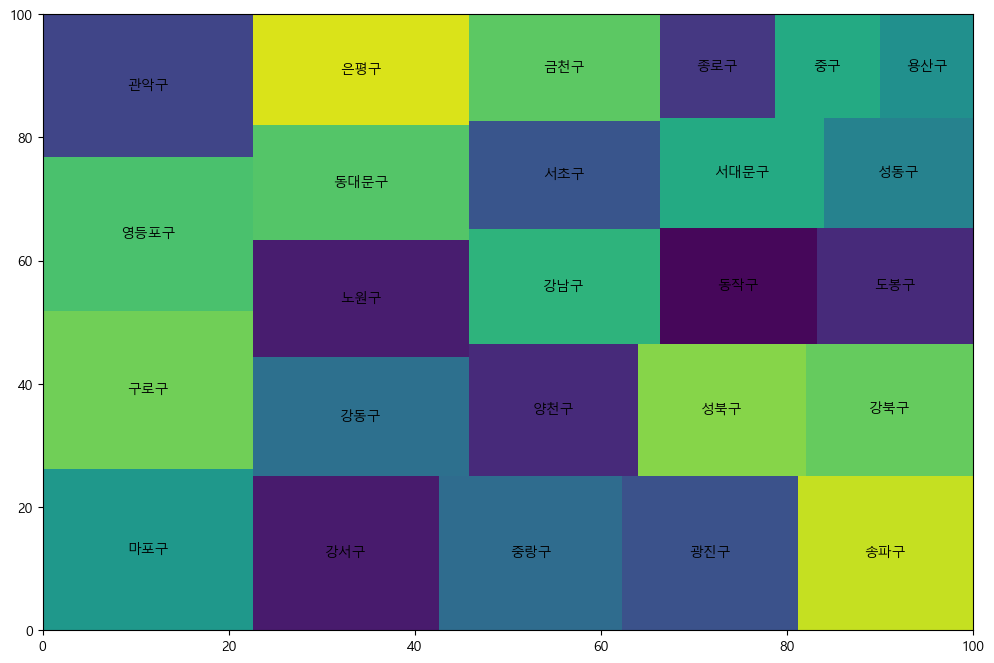

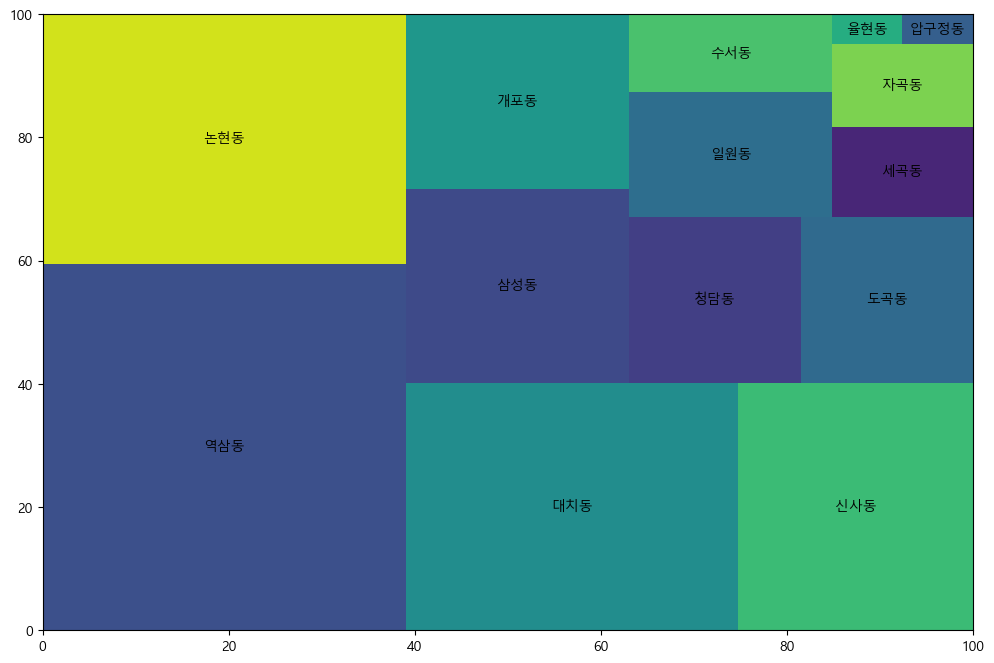

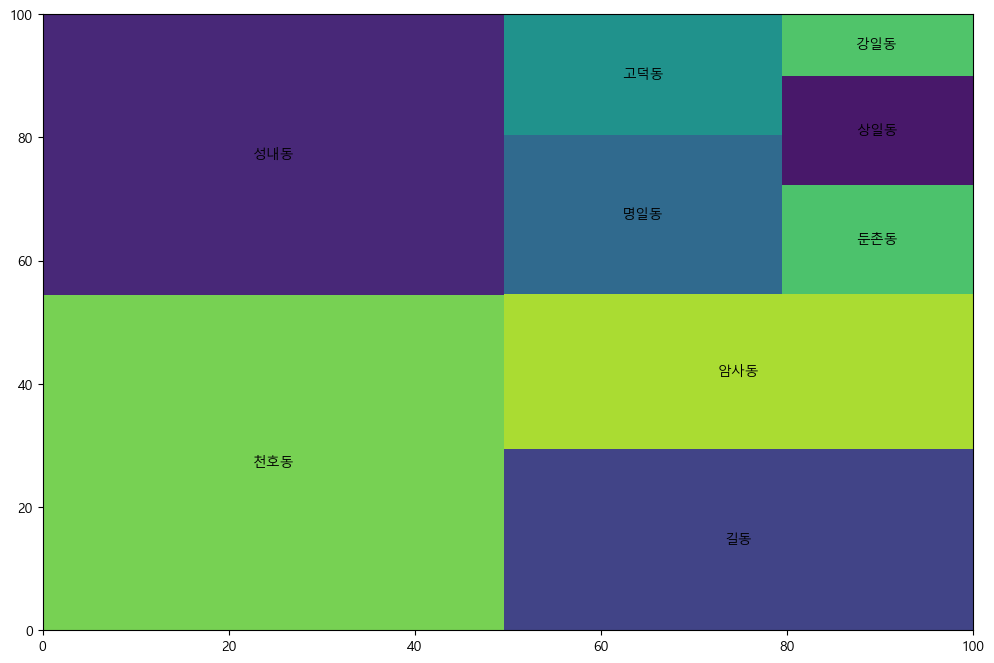

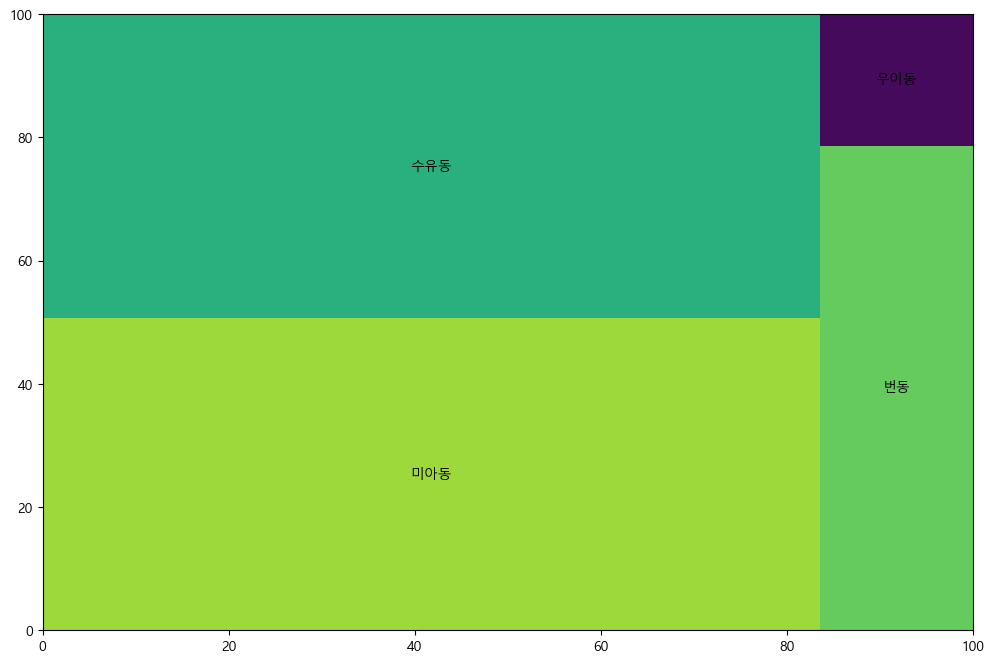

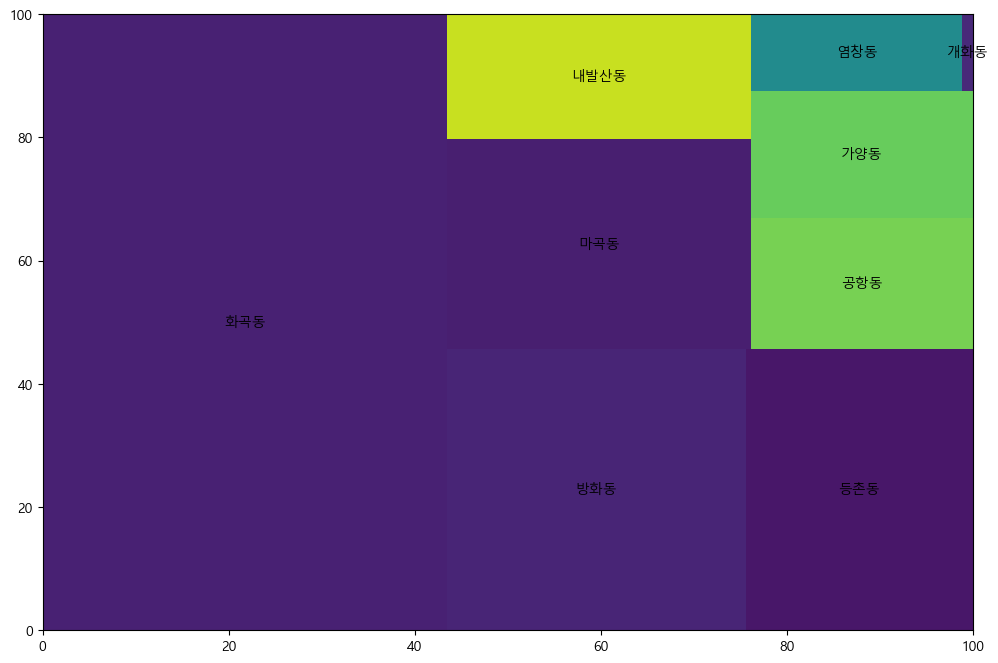

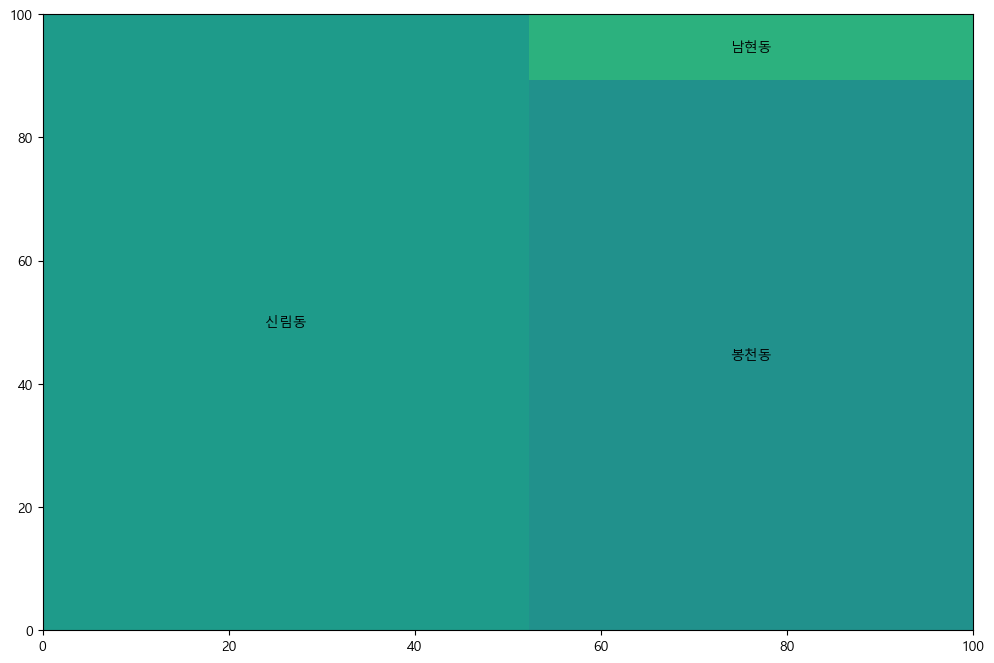

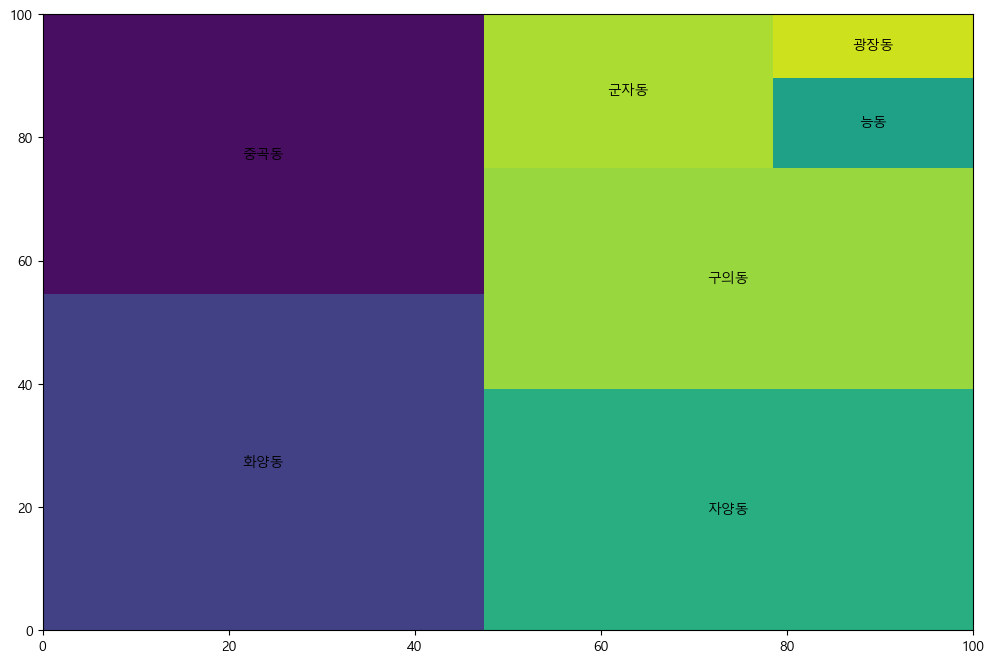

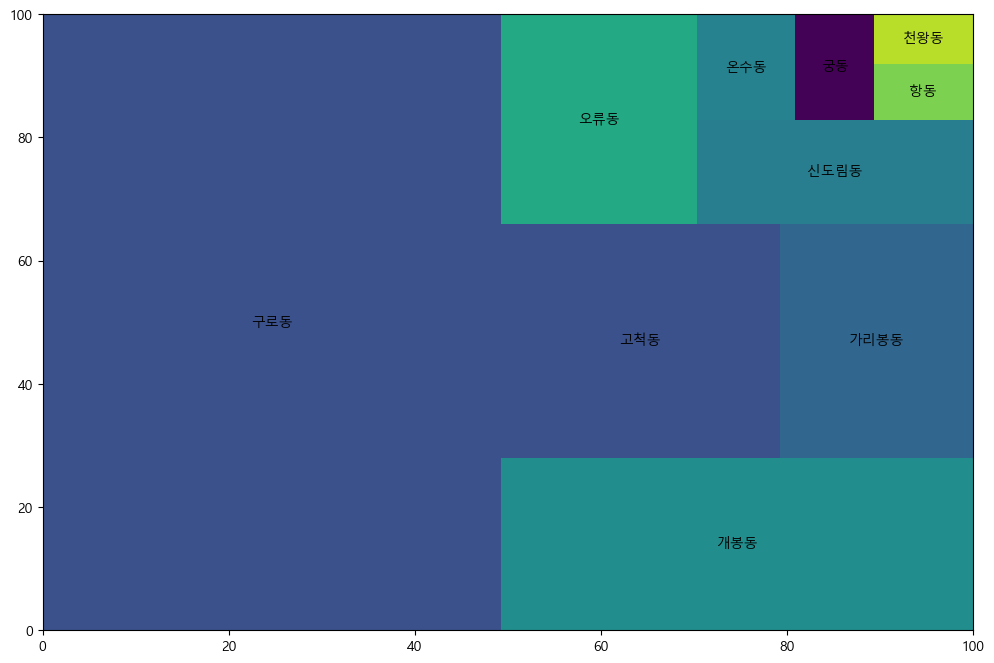

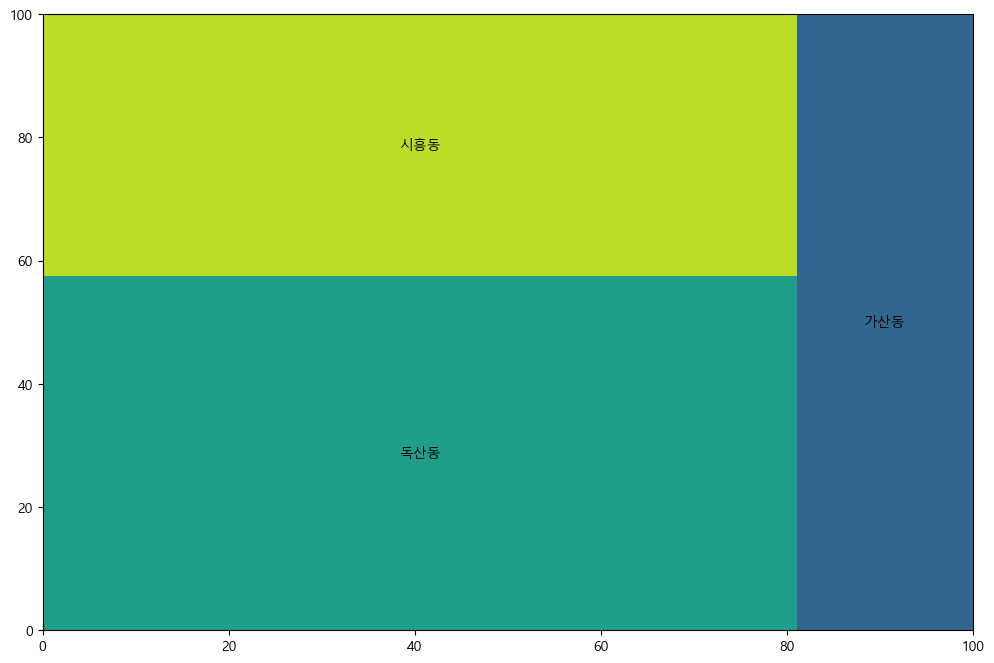

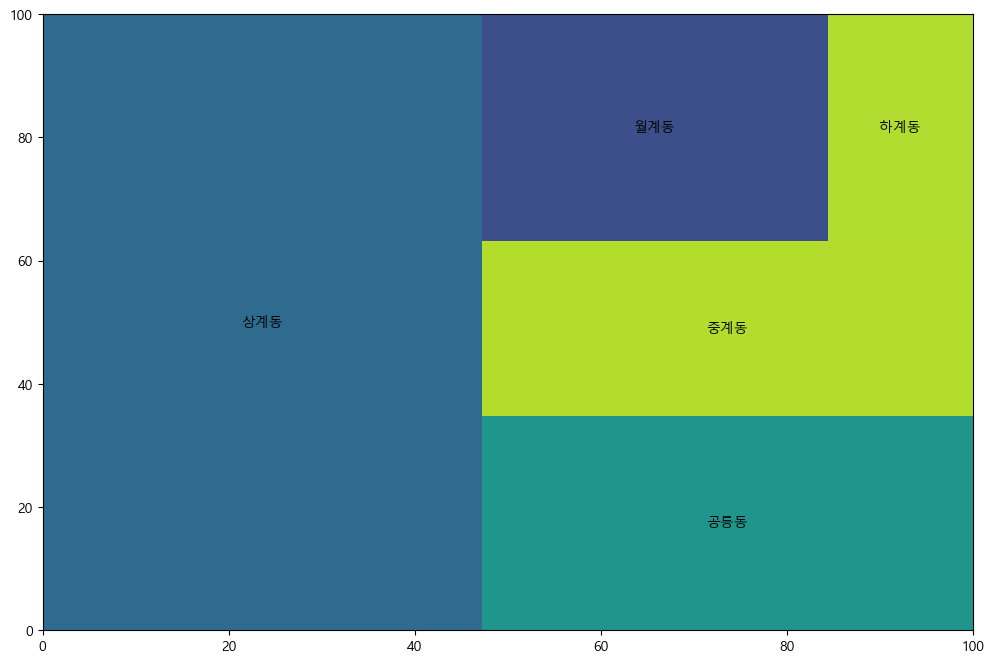

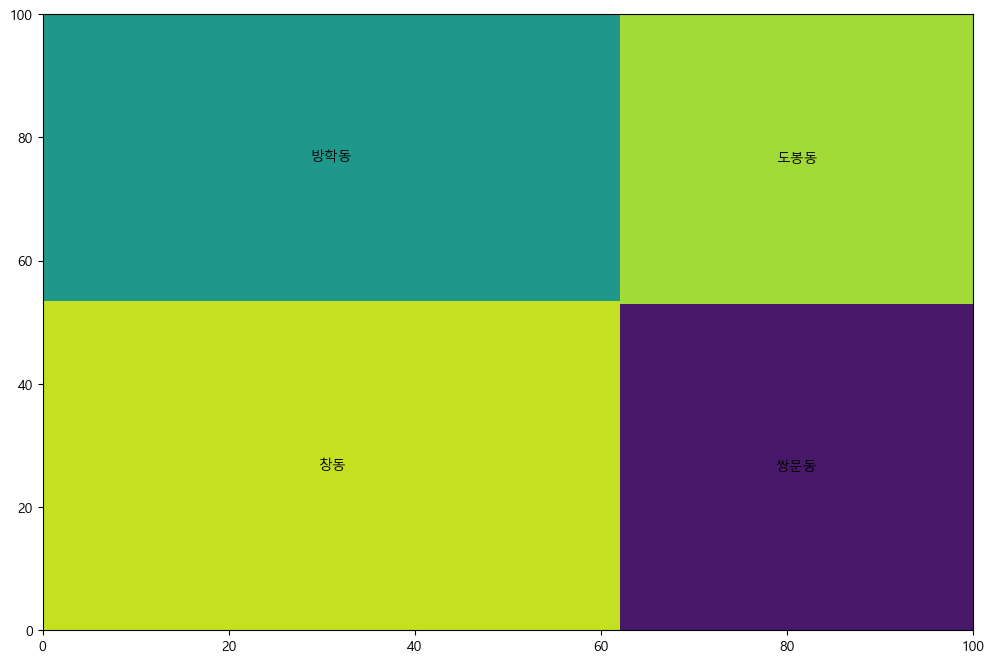

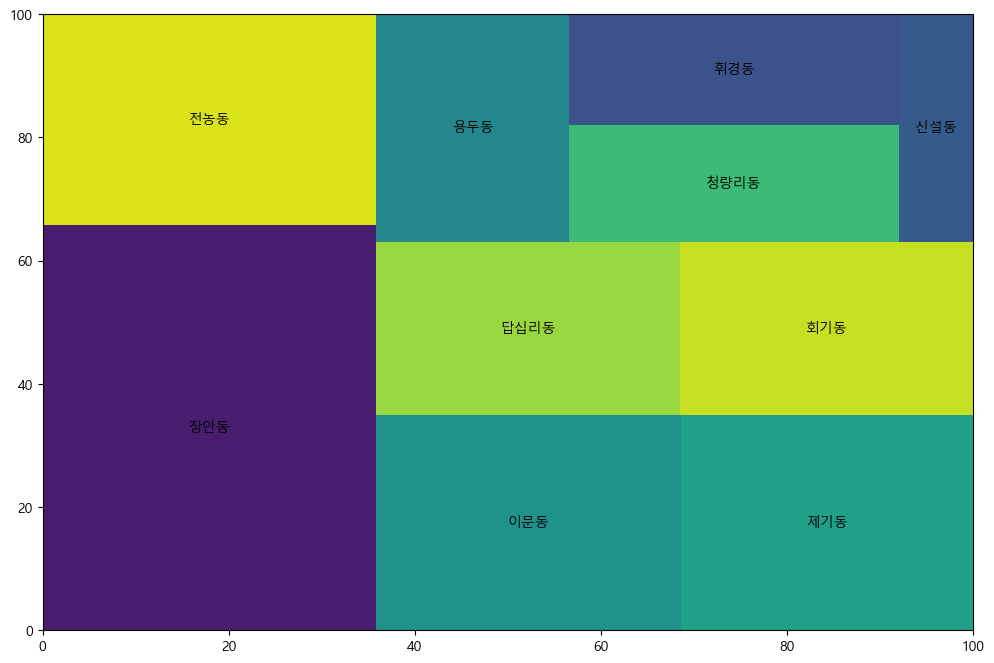

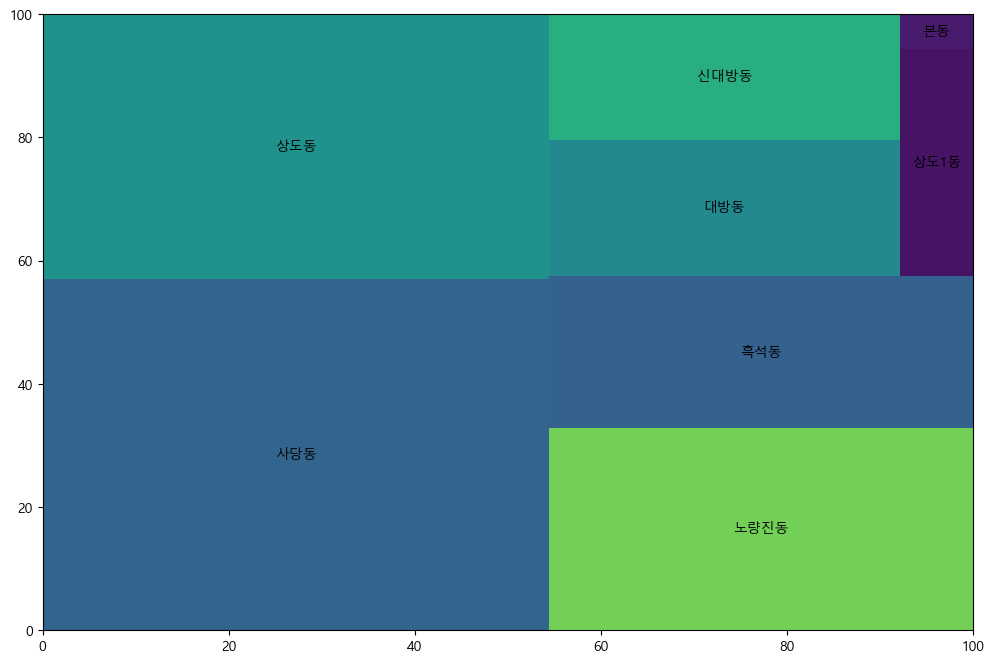

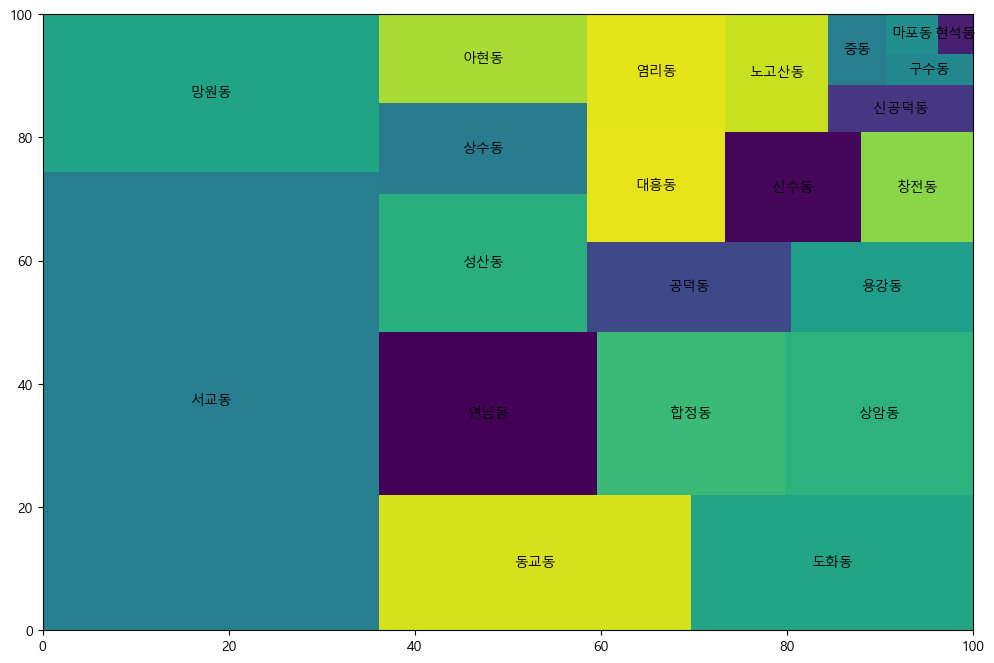

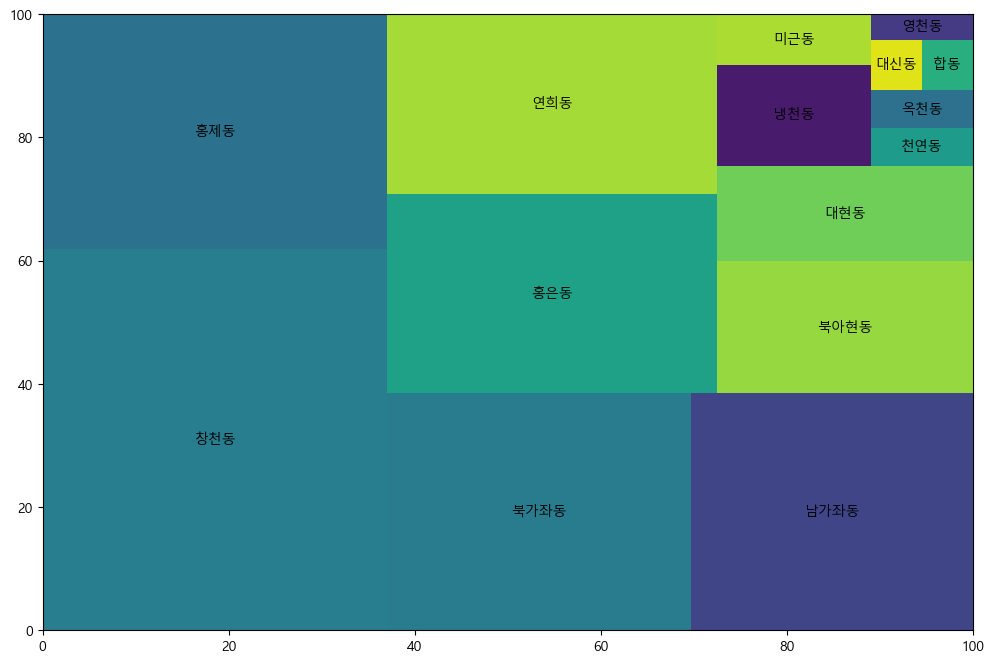

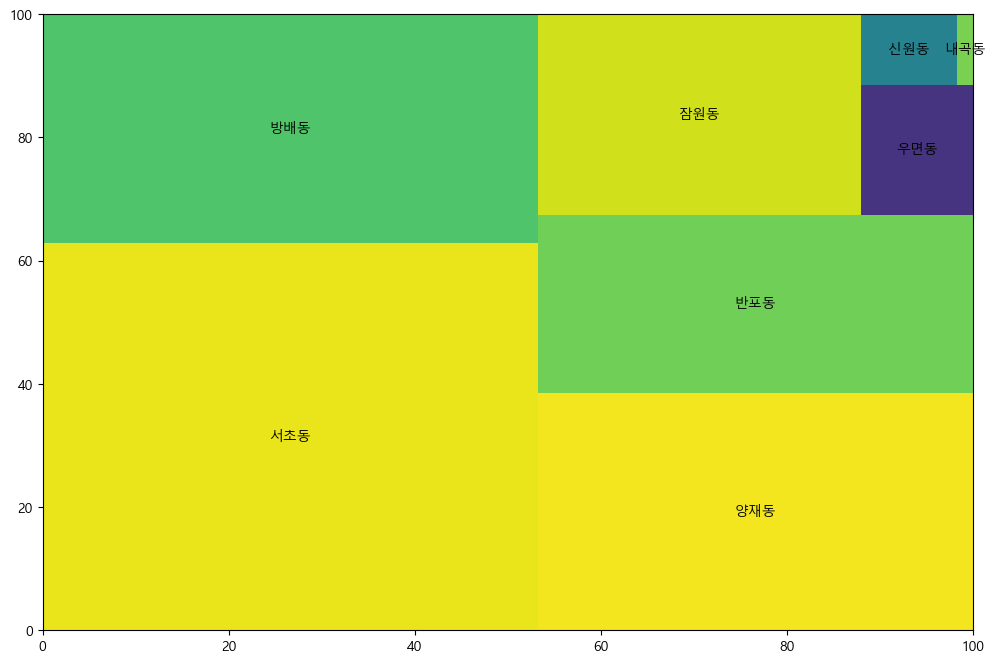

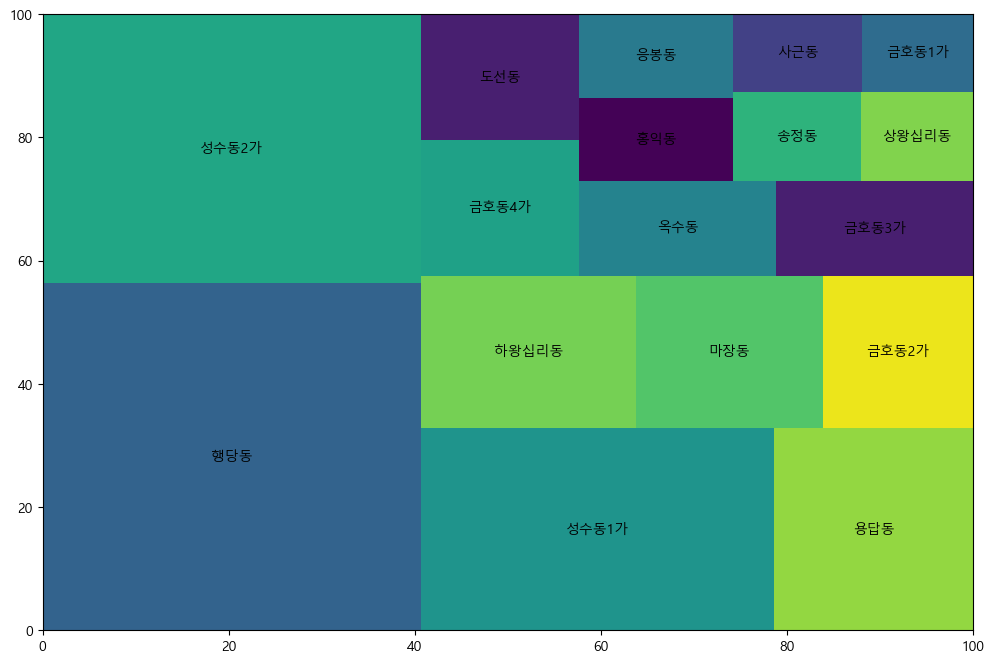

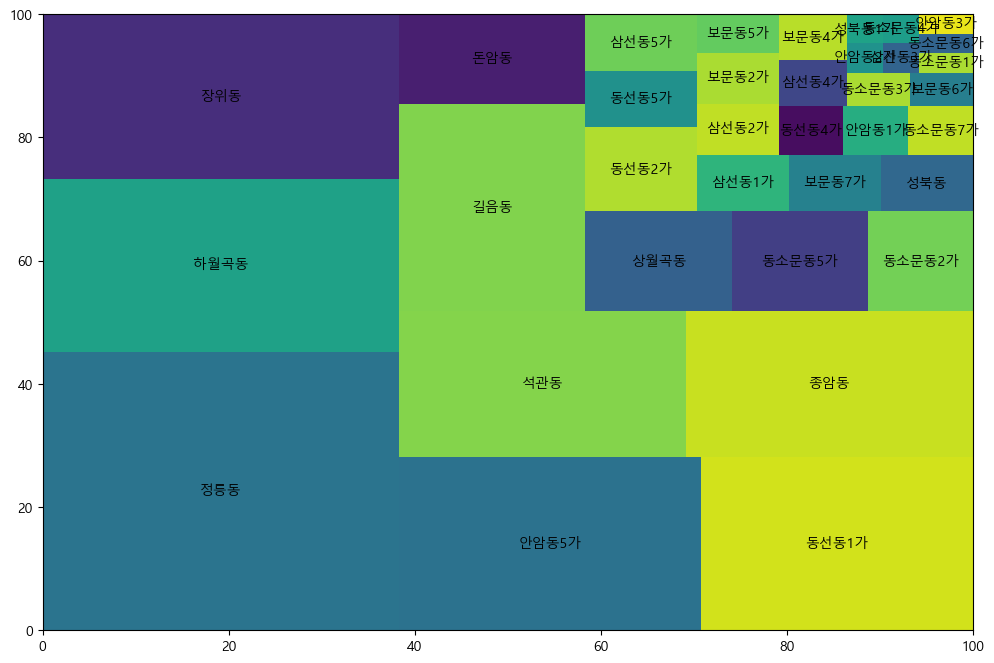

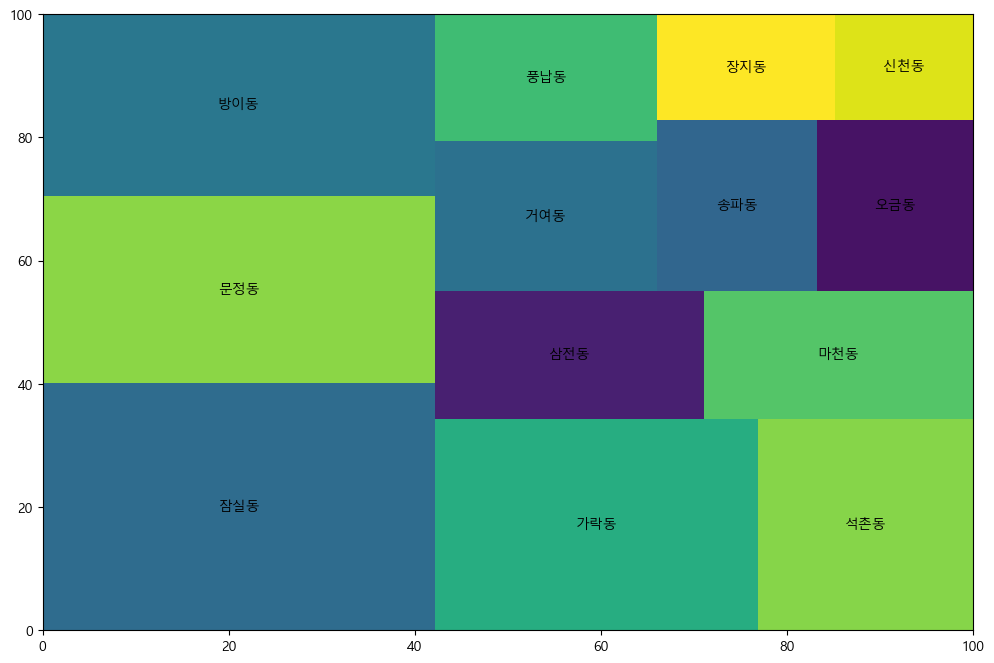

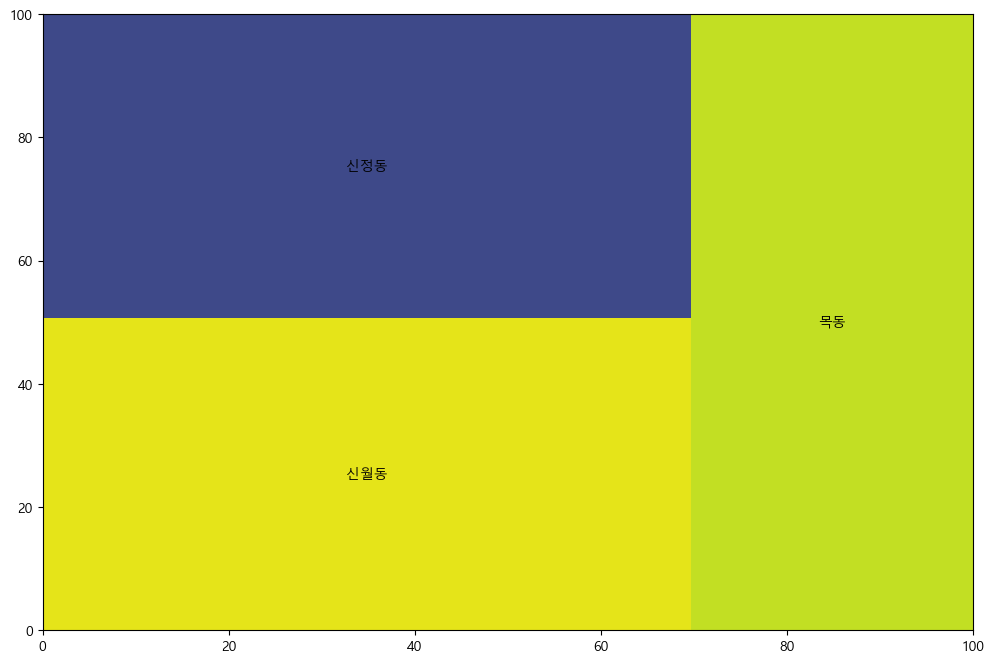

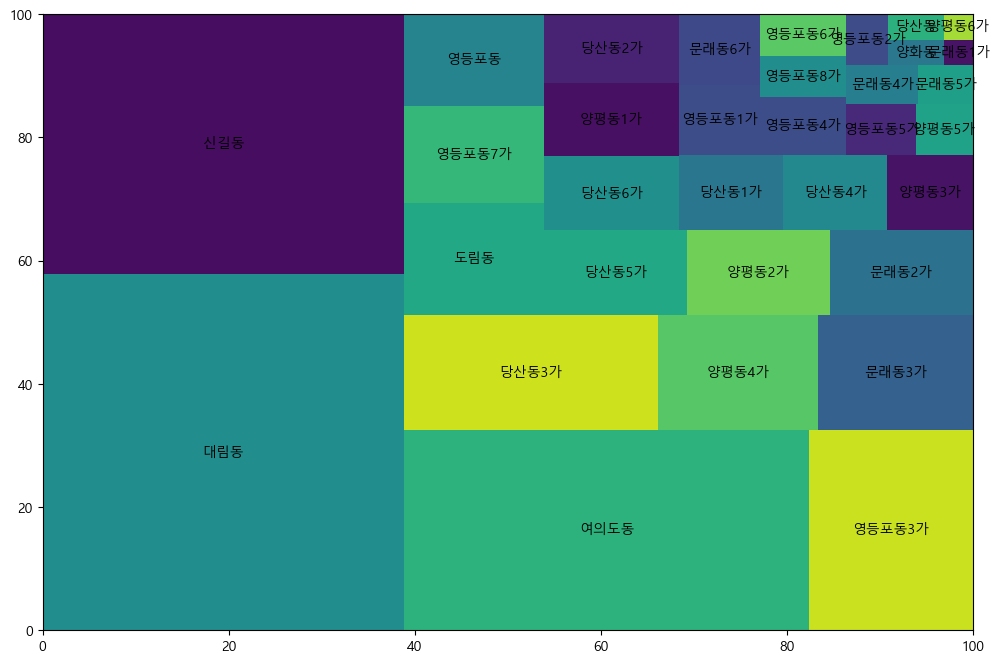

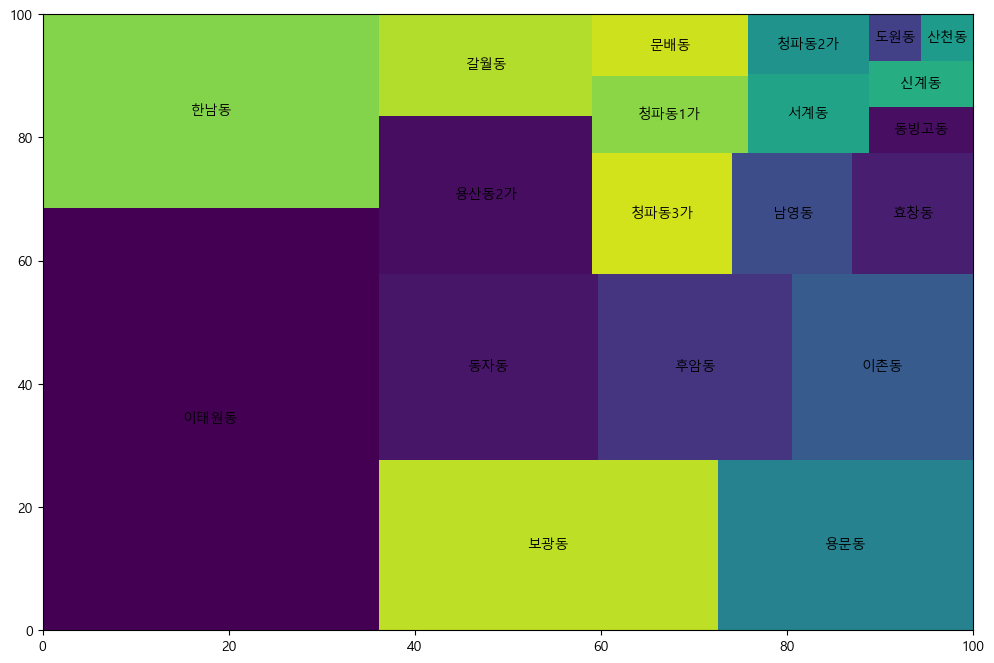

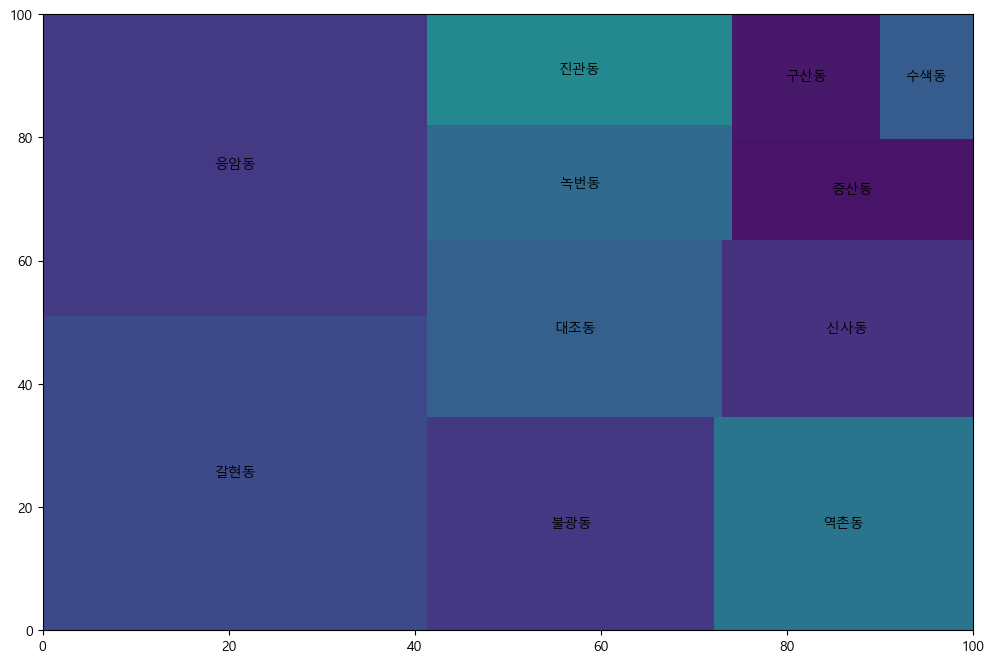

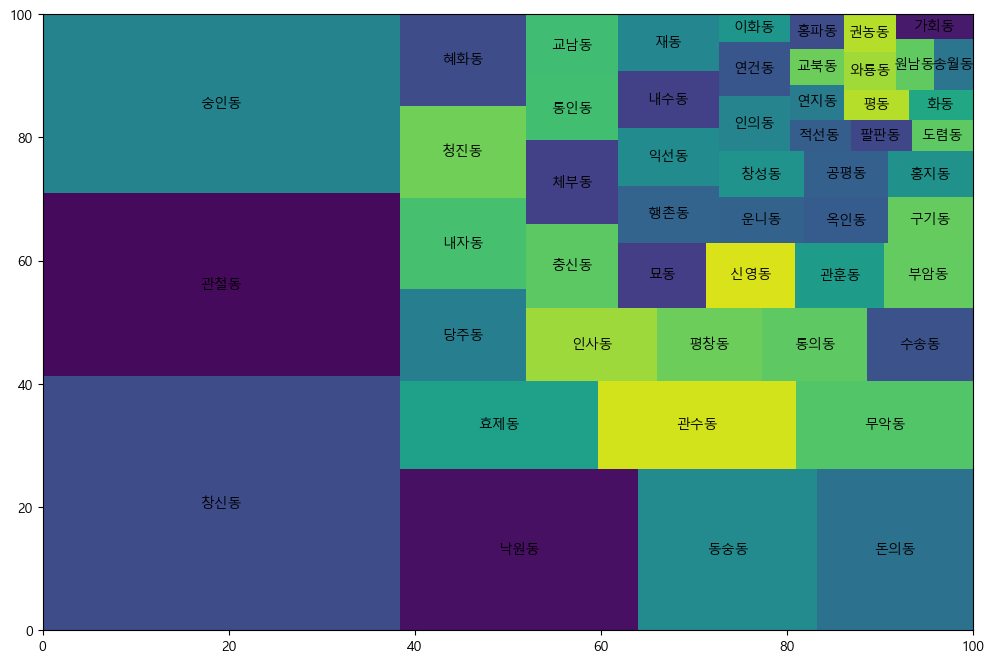

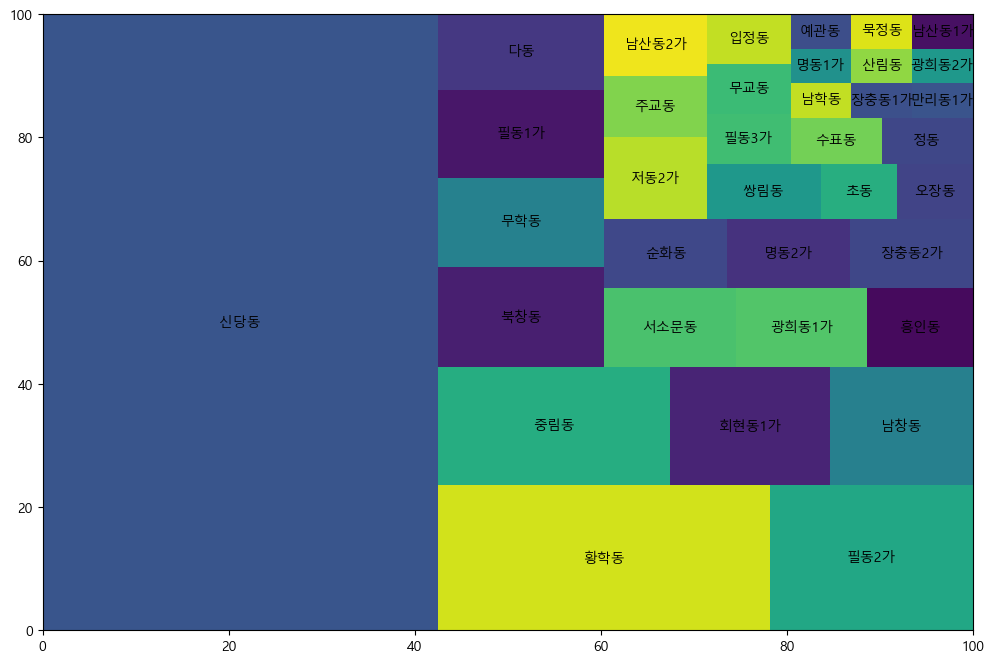

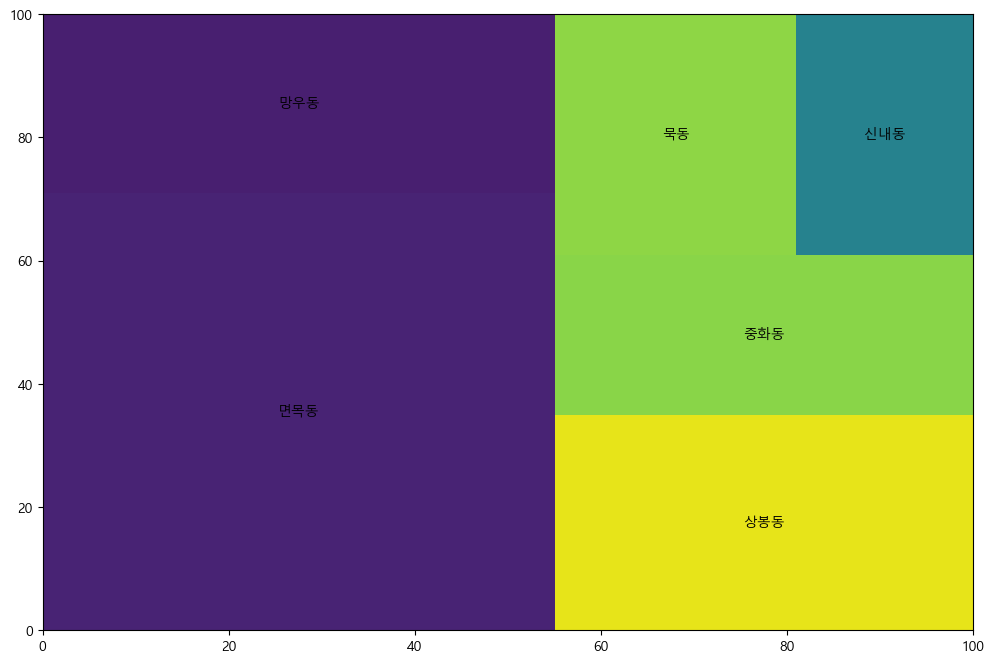

In [13]:
import squarify
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(12, 8))
squarify.plot(df.index.value_counts(), label=df.index.value_counts().index)
plt.title("서울시 전체 구의 치킨집 개수 트리맵")

for index in df.index.drop_duplicates():
    plt.figure(figsize=(12, 8))
    squarify.plot(
        df.loc[index]["행정동"].value_counts(),
        label=df.loc[index]["행정동"].value_counts().index,
    )
    plt.title(f"{index}의 치킨집 개수 트리맵")
    plt.show()

# df.index.drop_duplicates()